<a href="https://colab.research.google.com/github/rodrigourech/ivi/blob/main/notekoobs/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Datenquellen
url_rcp45 = "https://raw.githubusercontent.com/rodrigourech/gdv/main/RCP45_tas.csv"
url_rcp85 = "https://raw.githubusercontent.com/rodrigourech/gdv/main/RCP85_tas.csv"
url_pr_45 = "https://raw.githubusercontent.com/rodrigourech/gdv/main/RCP45_pr.csv"
url_pr_85 = "https://raw.githubusercontent.com/rodrigourech/gdv/main/RCP85_pr.csv"



# CSVs einlesen
df_rcp45 = pd.read_csv(url_rcp45, parse_dates=["date"], encoding="utf-8-sig")
df_rcp85 = pd.read_csv(url_rcp85, parse_dates=["date"], encoding="utf-8-sig")
df_rcp45_small = df_rcp45.sample(n=3000, random_state=42).reset_index(drop=True)
df_rcp85_large = df_rcp85.sample(n=300000, random_state=42).reset_index(drop=True)

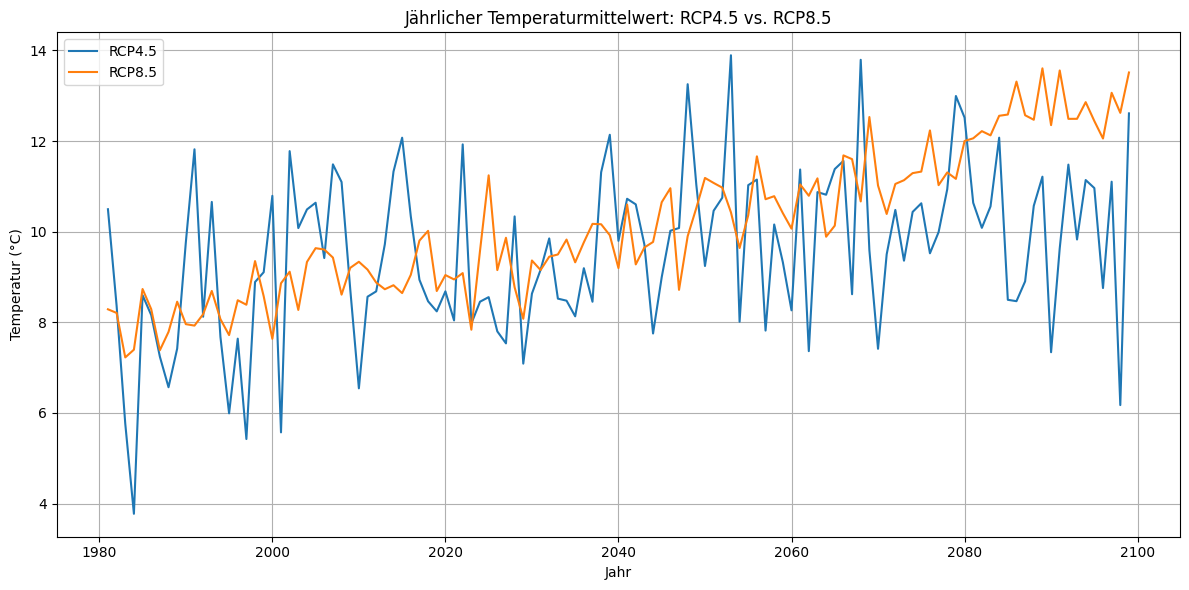

In [4]:
# Szenario-Label hinzufügen
df_rcp45_small["scenario"] = "RCP4.5"
df_rcp85_large["scenario"] = "RCP8.5"
df = pd.concat([df_rcp45_small, df_rcp85_large], ignore_index=True) # Zusammenführen

# Jahr extrahieren
df["year"] = df["date"].dt.year

# Jahresmitteltemperatur berechnen
df_yearly = df.groupby(["year", "scenario"]).agg({"value": "mean"}).reset_index()

# Plot: Temperaturvergleich RCP4.5 vs. RCP8.5
plt.figure(figsize=(12, 6))
for scenario in df_yearly["scenario"].unique():
    subset = df_yearly[df_yearly["scenario"] == scenario]
    plt.plot(subset["year"], subset["value"], label=scenario)

plt.title("Jährlicher Temperaturmittelwert: RCP4.5 vs. RCP8.5")
plt.xlabel("Jahr")
plt.ylabel("Temperatur (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


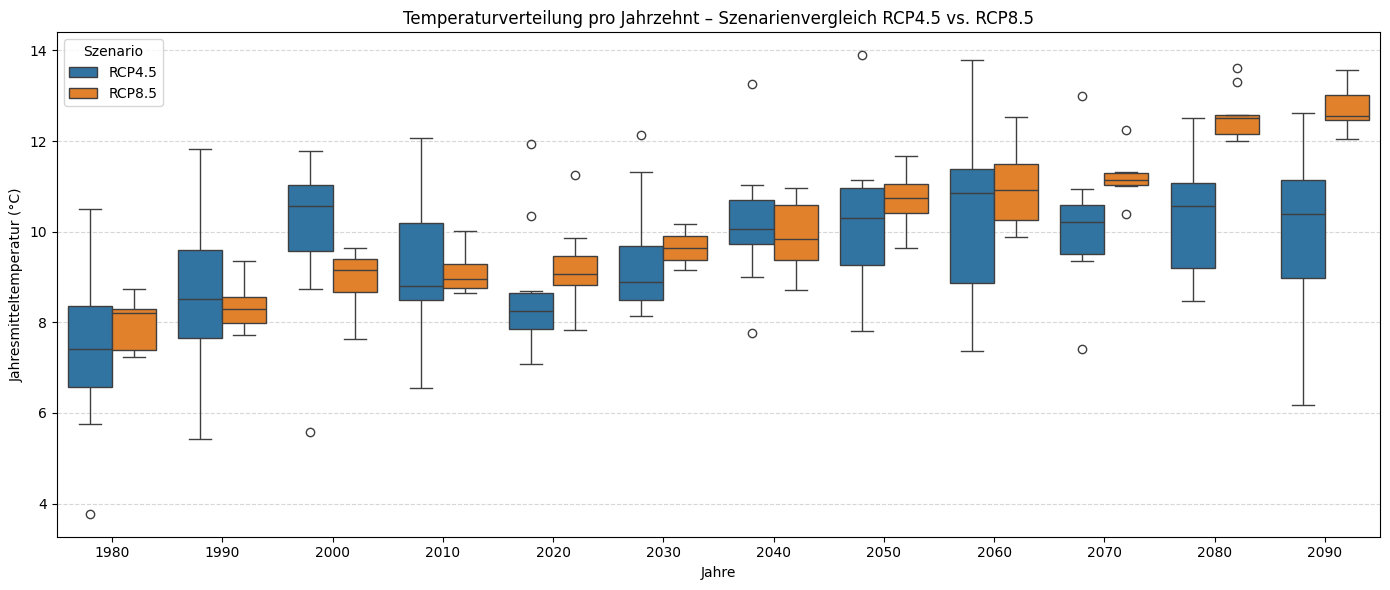

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vorbereitung: dekadische Gruppierung
df_yearly["decade"] = (df_yearly["year"] // 10) * 10  # z. B. 2054 → 2050

# Plot: Boxplot nach Dekade & Szenario
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_yearly, x="decade", y="value", hue="scenario")

plt.title("Temperaturverteilung pro Jahrzehnt – Szenarienvergleich RCP4.5 vs. RCP8.5")
plt.xlabel("Jahre")
plt.ylabel("Jahresmitteltemperatur (°C)")
plt.legend(title="Szenario")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


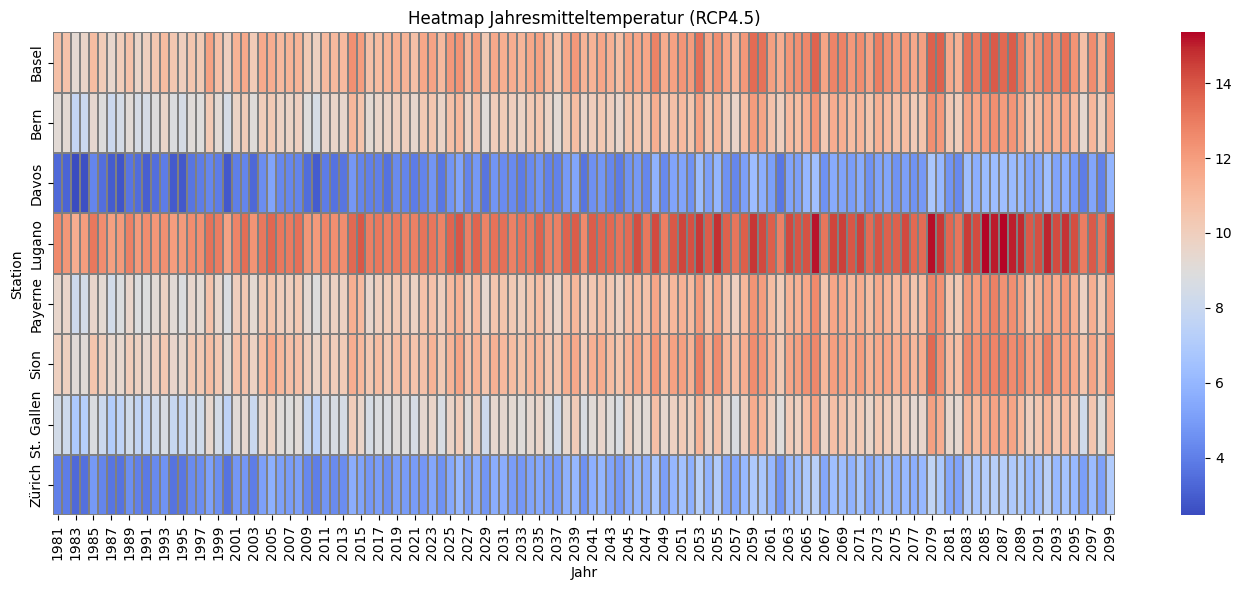

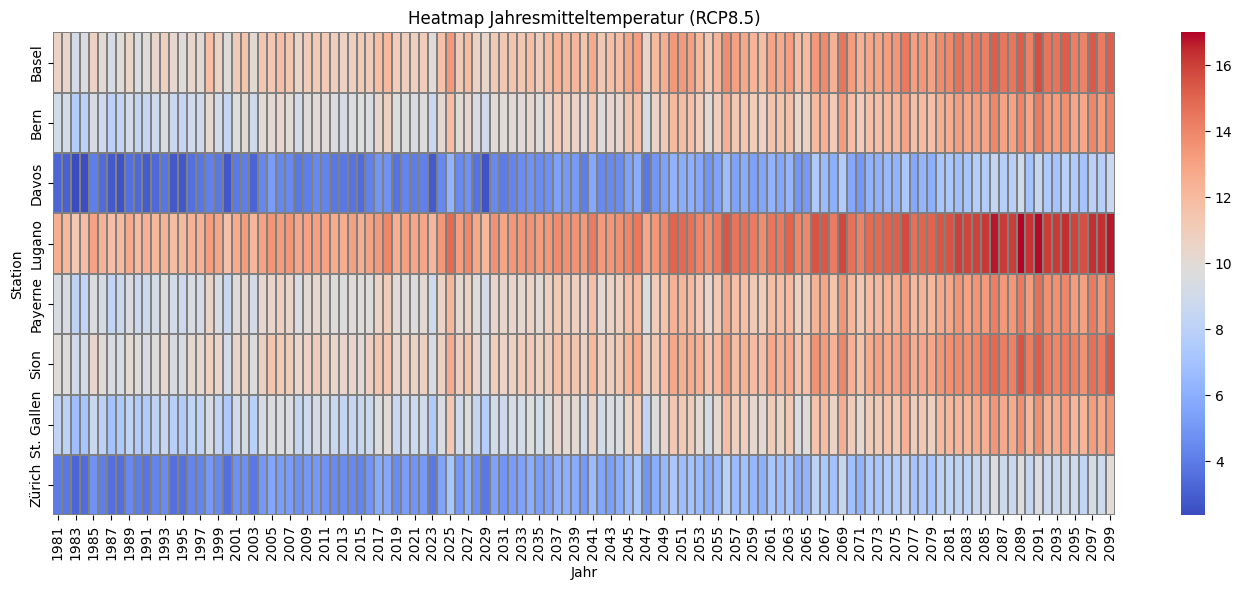

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df_rcp45 = pd.read_csv(url_rcp45, parse_dates=["date"], encoding="utf-8-sig")
df_rcp85 = pd.read_csv(url_rcp85, parse_dates=["date"], encoding="utf-8-sig")
df_rcp45["scenario"] = "RCP4.5"
df_rcp85["scenario"] = "RCP8.5"

# Kombinieren und Jahr extrahieren
df_all = pd.concat([df_rcp45, df_rcp85], ignore_index=True)
df_all["year"] = df_all["date"].dt.year

# Jahresmittel pro Station und Jahr berechnen
df_avg = df_all.groupby(["scenario", "station", "year"]).agg({"value": "mean"}).reset_index()

# Szenarien trennen
df_45 = df_avg[df_avg["scenario"] == "RCP4.5"]
df_85 = df_avg[df_avg["scenario"] == "RCP8.5"]

# Heatmap: RCP4.5
pivot_45 = df_45.pivot(index="station", columns="year", values="value")
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_45, cmap="coolwarm", linewidths=0.3, linecolor='gray')
plt.title("Heatmap Jahresmitteltemperatur (RCP4.5)")
plt.xlabel("Jahr")
plt.ylabel("Station")
plt.tight_layout()
plt.show()

# Heatmap: RCP8.5
pivot_85 = df_85.pivot(index="station", columns="year", values="value")
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_85, cmap="coolwarm", linewidths=0.3, linecolor='gray')
plt.title("Heatmap Jahresmitteltemperatur (RCP8.5)")
plt.xlabel("Jahr")
plt.ylabel("Station")
plt.tight_layout()
plt.show()


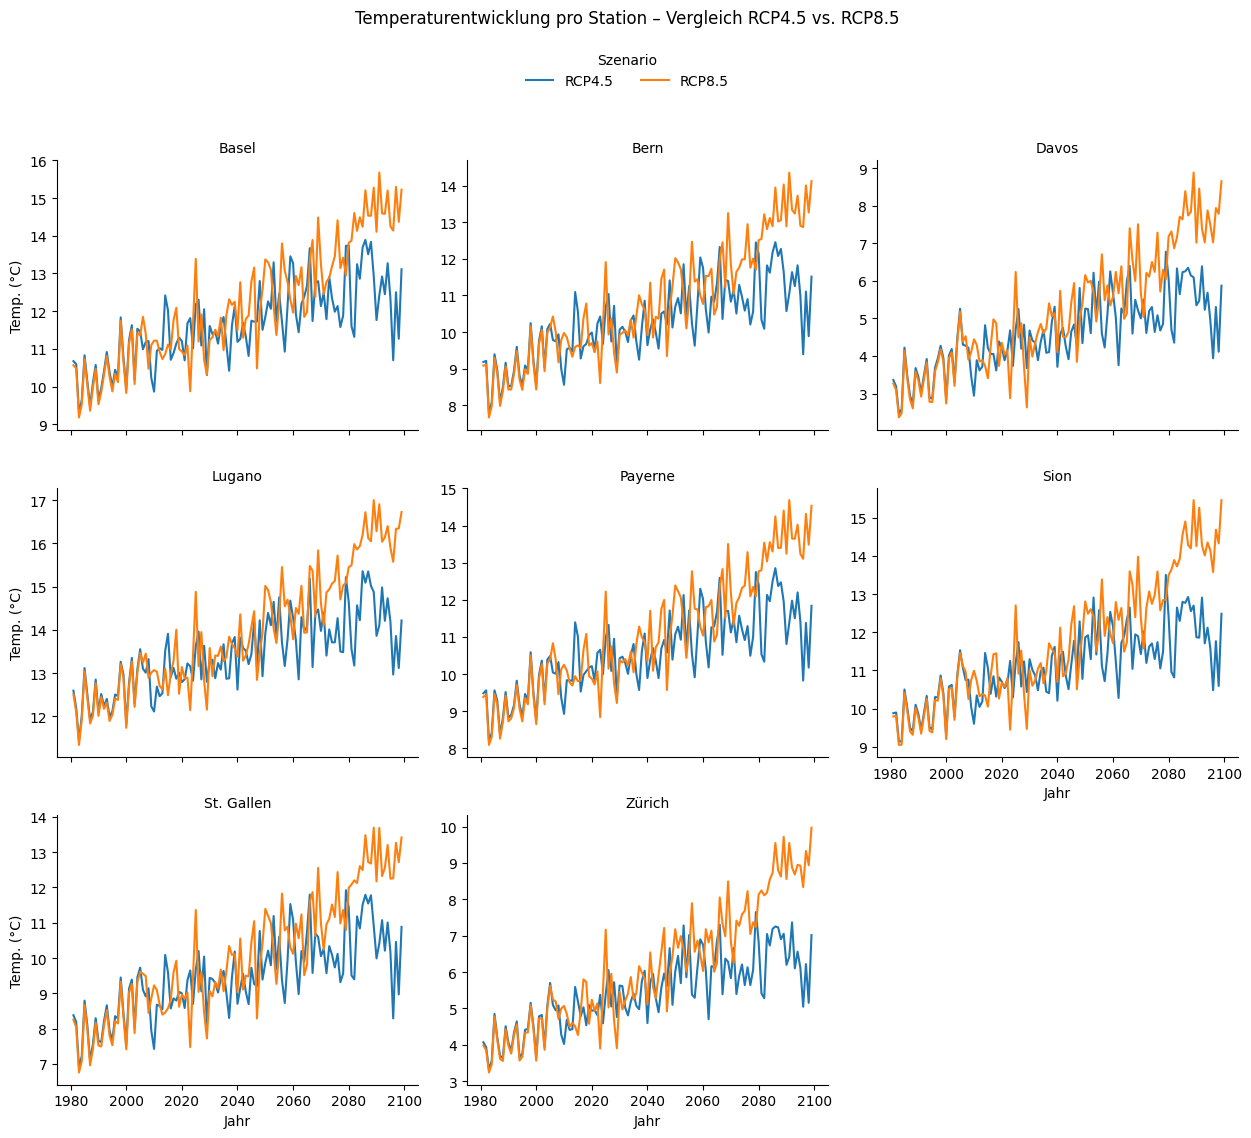

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# FacetGrid: Temperaturverlauf pro Station
g = sns.FacetGrid(df_year_station, col="station", hue="scenario", col_wrap=3, height=3.5, sharey=False)
g.map(sns.lineplot, "year", "value")

# Achsen und Titel
g.set_axis_labels("Jahr", "Temp. (°C)")
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.90, bottom=0.10)

# Legende
g.add_legend(title="Szenario", bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=2)

# Haupttitel
g.fig.suptitle("Temperaturentwicklung pro Station – Vergleich RCP4.5 vs. RCP8.5", y=1.08)

plt.tight_layout()
plt.show()
